In [65]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import numpy.linalg
import scipy.linalg as spla
# %matplotlib tk

import quadrilateral_element
from element_operations.poisson import *
from utils import *
# Gaussian/Normal
def gaus(x,L,x0,y0):
    f=(1/(2*np.pi*L**2))*np.exp(-((x[0]-x0)**2+(x[1]-y0)**2)/(2*L**2))
    return f

# Pyramid 
def pyr(x,L,x0,y0):
    pyramid =lambda x: (3/(L**2))*((L/2)-(max(np.abs(x[0]-x0),np.abs(x[1]-y0))))
    f1 = pyramid(x)*(x0-L/2 <= x[0])*(x[0] <= x0+L/2)*(y0-L/2 <= x[1])*(x[1] <= y0+L/2)
    return f1

# 2D Step
def step(x,L,x0,y0):
    f2 = (1/L**2)*(x0-L/2 <= x[0])*(x[0] <= x0+L/2)*(y0-L/2 <= x[1])*(x[1] <= y0+L/2)
    return f2

#True
def true(x):
    u=-np.log(np.sqrt((x[0]-0.5)**2+(x[1]-0.5)**2))/(2*np.pi)
    return u

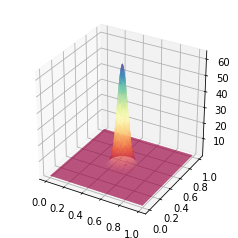

In [2]:
coordinates3 = np.array([ (0,0), (1,0), (1,1), (0,1) ]) 
connectivity3 = np.array([[0,1,2,3]])

# Refine a few times
exp=7
for i in range(exp):
    coordinates3, connectivity3 = subdivide_mesh( coordinates3, connectivity3 )

L=0.05

f=np.array([gaus(coordinate,L,0.5,0.5) for coordinate in coordinates3])
plot_contour_3d( coordinates3, f )

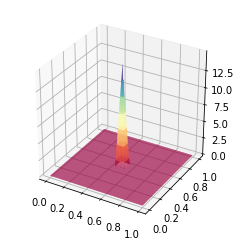

In [70]:
f1=np.array([pyr(coordinate,0.1,0.5,0.5) for coordinate in coordinates3])
plot_contour_3d( coordinates3, f1 )

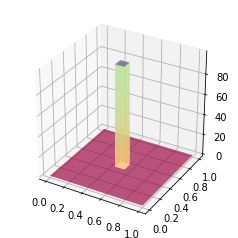

In [71]:
f2=np.array([step(coordinate,0.1,0.5,0.5) for coordinate in coordinates3])
plot_contour_3d( coordinates3, f2 )

C:\Users\Jessica Flores\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


[0.0551589  0.0551589  0.0551589  ... 0.18688128 0.18176136 0.17950502]


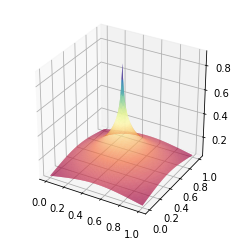

In [69]:
f3=np.array([true(coordinate) for coordinate in coordinates3])
f3[np.isinf(f3)]=0.9
print(f3)
plot_contour_3d( coordinates3, f3 )

In [72]:
def uexact(x,x0,y0):
    N=100
    uexact = -sum([-4/(((2*j-1)**2+(2*k-1)**2)*np.pi**2)*np.sin((2*j-1)*np.pi*x0)*np.sin((2*k-1)*np.pi*y0)*np.sin((2*j-1)*np.pi*x[0])*np.sin((2*k-1)*np.pi*x[1]) for j in range(1,N) for k in range(1,N)])
    return uexact

-3.579077192347394e-16


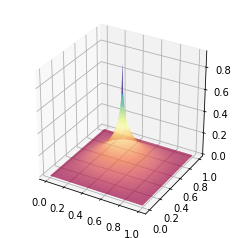

In [74]:
exact=np.array([uexact(coordinate,0.5,0.5) for coordinate in coordinates3])
plot_contour_3d( coordinates3, exact )

print(min(exact))

In [75]:
def infnorm(exact,approx):
    return(max(abs(exact-approx)))

def relerr(exact,approx):
    return abs((exact-approx)/exact)

def abserr(exact,approx):
    return abs((exact-approx))

0.11340949881910867


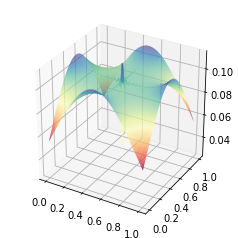

In [76]:
err=abserr(exact,f3)

plot_contour_3d( coordinates3, err )
print(infnorm(exact,f3))

In [87]:
list1, list2 = [[1,2], [3,4], [5,6]], [1,2,3]
for i in range(len(list1)):
    list1[i]=tuple(list1[i])
print(list1)
d=dict( zip( list1, list2))
print(d)

[(1, 2), (3, 4), (5, 6)]
{(1, 2): 1, (3, 4): 2, (5, 6): 3}


In [91]:
coordinates3=list(coordinates3)

In [92]:
for i in range(len(coordinates3)):
    coordinates3[i]=tuple(coordinates3[i])


[(0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.5, 0.5), (0.5, 0.0), (1.0, 0.5), (0.5, 1.0), (0.0, 0.5), (0.25, 0.25), (0.75, 0.25), (0.75, 0.75), (0.25, 0.75), (0.25, 0.5), (0.0, 0.25), (0.25, 0.0), (0.5, 0.25), (0.75, 0.0), (1.0, 0.25), (0.75, 0.5), (1.0, 0.75), (0.75, 1.0), (0.5, 0.75), (0.25, 1.0), (0.0, 0.75), (0.375, 0.375), (0.125, 0.375), (0.125, 0.125), (0.375, 0.125), (0.625, 0.375), (0.625, 0.125), (0.875, 0.125), (0.875, 0.375), (0.625, 0.625), (0.875, 0.625), (0.875, 0.875), (0.625, 0.875), (0.375, 0.625), (0.375, 0.875), (0.125, 0.875), (0.125, 0.625), (0.375, 0.25), (0.5, 0.375), (0.375, 0.5), (0.25, 0.375), (0.125, 0.5), (0.0, 0.375), (0.125, 0.25), (0.0, 0.125), (0.125, 0.0), (0.25, 0.125), (0.375, 0.0), (0.5, 0.125), (0.75, 0.375), (0.625, 0.5), (0.625, 0.25), (0.625, 0.0), (0.75, 0.125), (0.875, 0.0), (1.0, 0.125), (0.875, 0.25), (1.0, 0.375), (0.875, 0.5), (0.625, 0.75), (0.5, 0.625), (0.75, 0.625), (1.0, 0.625), (0.875, 0.75), (1.0, 0.875), (0.875, 1.0), (0.75,

In [93]:
d=dict( zip( coordinates3, exact))
print(d)

{(0.0, 0.0): -0.0, (1.0, 0.0): -0.0, (1.0, 1.0): 1.248181699779745e-30, (0.0, 1.0): -0.0, (0.5, 0.5): 0.9246443804476427, (0.5, 0.0): -0.0, (1.0, 0.5): -3.547917705897682e-17, (0.5, 1.0): -3.5479177058974984e-17, (0.0, 0.5): -0.0, (0.25, 0.25): 0.0701400658049853, (0.75, 0.25): 0.07014006580498498, (0.75, 0.75): 0.07014006580498483, (0.25, 0.75): 0.070140065804985, (0.25, 0.5): 0.1210715107847865, (0.0, 0.25): -0.0, (0.25, 0.0): -0.0, (0.5, 0.25): 0.12107151078478681, (0.75, 0.0): -0.0, (1.0, 0.25): 9.201628622041204e-18, (0.75, 0.5): 0.12107151078478616, (1.0, 0.75): 9.201628622040375e-18, (0.75, 1.0): 9.201628622040305e-18, (0.5, 0.75): 0.1210715107847865, (0.25, 1.0): 9.20162862204119e-18, (0.0, 0.75): -0.0, (0.375, 0.375): 0.17772262190504565, (0.125, 0.375): 0.04821350640648488, (0.125, 0.125): 0.01712430622278422, (0.375, 0.125): 0.048213506406484884, (0.625, 0.375): 0.17772262190504573, (0.625, 0.125): 0.048213506406484835, (0.875, 0.125): 0.017124306222784186, (0.875, 0.375): 0

In [108]:
idxs=np.linspace(0,1,129)
y=np.zeros(len(idxs))
for idx,i in enumerate(idxs):
    y[idx]=d[(i,0.25)]

[-0.00000000e+00  2.10021498e-03  4.19807395e-03  6.29647630e-03
  8.39987596e-03  1.05079103e-02  1.26172102e-02  1.47283322e-02
  1.68459995e-02  1.89721900e-02  2.11038239e-02  2.32390419e-02
  2.53814124e-02  2.75348313e-02  2.96977257e-02  3.18664820e-02
  3.40423526e-02  3.62300334e-02  3.84301941e-02  4.06386702e-02
  4.28538374e-02  4.50796480e-02  4.73189812e-02  4.95685064e-02
  5.18239449e-02  5.40869330e-02  5.63616632e-02  5.86467607e-02
  6.09362668e-02  6.32283345e-02  6.55268378e-02  6.78327997e-02
  7.01400658e-02  7.24429045e-02  7.47428454e-02  7.70427902e-02
  7.93379794e-02  8.16193765e-02  8.38842413e-02  8.61358163e-02
  8.83719701e-02  9.05819522e-02  9.27575062e-02  9.48998630e-02
  9.70099851e-02  9.90778870e-02  1.01089816e-01  1.03042271e-01
  1.04938724e-01  1.06773116e-01  1.08528062e-01  1.10192797e-01
  1.11771427e-01  1.13265465e-01  1.14658303e-01  1.15929992e-01
  1.17081211e-01  1.18125037e-01  1.19054647e-01  1.19839699e-01
  1.20465663e-01  1.20959

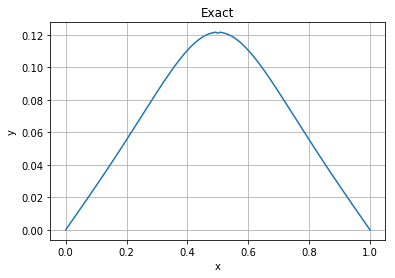

In [116]:
plt.plot(idxs, y,'-')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Exact')
plt.grid(True)
plt.show()

In [114]:
integral=np.trapz(y, x=idxs)
print(integral)

0.06817774677356495


In [ ]:
coordinates3=list(coordinates3)
for i in range(len(coordinates3)):
    coordinates3[i]=tuple(coordinates3[i])
d=dict( zip( coordinates3, exact))

idxs=np.linspace(0,1,129)
y=np.zeros(len(idxs))
for idx,i in enumerate(idxs):
    y[idx]=d[(i,0.25)]
plt.plot(idxs, y,'-')

plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.savefig("test.png")
plt.show()

integral=np.trapz(y, x=idxs)
print(integral)

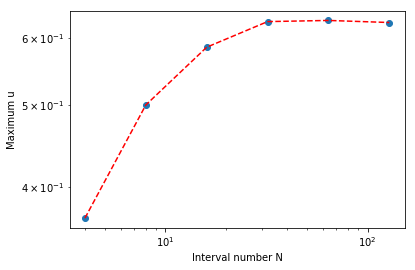

In [120]:
N=[4,8,16,32,64,128]
maxu=[0.36717477, 0.49970227, 0.58485561, 0.62712311, 0.62910242,
 0.62556491]
fig,ax = plt.subplots()
ax.loglog( N , maxu , 'o')
ax.loglog( N , maxu , 'r--')
ax.set_xlabel('Interval number N')
ax.set_ylabel('Maximum u')
plt.show()